<a href="https://colab.research.google.com/github/kunalNbadgujar/Face-Mask-Detection-Deep-Learning-Project-/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning Project

# **FACE MASK DETECTION**

**Problem Statement** :-

The Dataset contains images of people wearing masks and people not wearing masks. The database contains 10,000 colored images in the training folder, 800 images in the validation folder, and 992 images in the test folder.

 Task is to create a CNN model for identifying whether a person in the image is wearing a mask or not.

### **let's Start...**



---
Mounting Drive


In [88]:
from google.colab import drive

In [89]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


.

.


---
**Import Libraries** 



In [90]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [91]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

.

.
.


---


**Importing Directories**

In [92]:
train_dir        = "/content/drive/MyDrive/Internshala Assignement/Final Project/images/Train"
test_dir         = "/content/drive/MyDrive/Internshala Assignement/Final Project/images/Test"
validation_dir   = "/content/drive/MyDrive/Internshala Assignement/Final Project/images/Validation"

.

.

**Pre-Processing**

In [93]:
train_data_gen = ImageDataGenerator(
    rescale =   1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)


In [94]:
test_data_gen = ImageDataGenerator(
    rescale = 1./255
)

In [95]:
train_generator =  trian_data_gen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size = 20,
    class_mode = 'binary'
) 
    

Found 10000 images belonging to 2 classes.


In [96]:
validation_generator = test_data_gen.flow_from_directory(
    validation_dir,
    target_size = (128,128),
    batch_size = 20,
    class_mode = 'binary'
    
)

Found 800 images belonging to 2 classes.


.

.

**Training Convolutional Model**

In [97]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [98]:
model  = models.Sequential()


model.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))




model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))




model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))



model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))





model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [99]:
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 128)    

In [100]:
from tensorflow.keras import optimizers

In [101]:
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr=1e-4),
              metrics= ['acc'])

In [102]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 500,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = 40
)

<ipython-input-102-def8cc5844a9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
500/500 [==============================] - 536s 1s/step - loss: 0.2969 - acc: 0.8842 - val_loss: 0.4067 - val_acc: 0.7937
Epoch 2/5
500/500 [==============================] - 477s 954ms/step - loss: 0.2099 - acc: 0.9190 - val_loss: 0.0829 - val_acc: 0.9737
Epoch 3/5
500/500 [==============================] - 488s 974ms/step - loss: 0.1862 - acc: 0.9360 - val_loss: 0.1194 - val_acc: 0.9625
Epoch 4/5
500/500 [==============================] - 486s 971ms/step - loss: 0.1642 - acc: 0.9445 - val_loss: 0.0744 - val_acc: 0.9762
Epoch 5/5
500/500 [==============================] - 500s 1s/step - loss: 0.1484 - acc: 0.9482 - val_loss: 0.0733 - val_acc: 0.9787


In [103]:
model.save('face_mask_detection_conv_model.h5')

In [104]:
import matplotlib.pyplot as plt

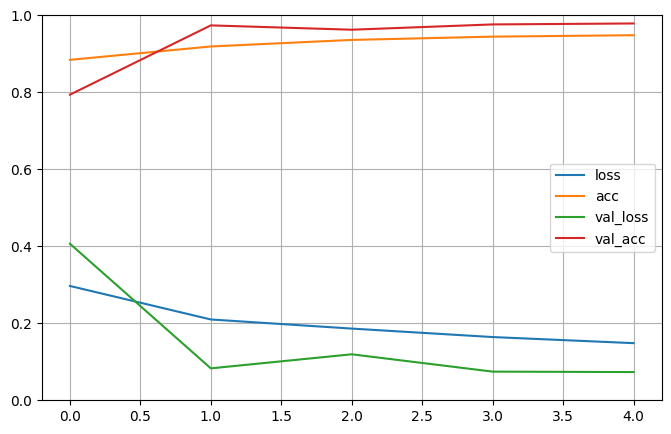

In [105]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

.

.

.

.



---


**Train Model Using VGG19**

In [106]:
from tensorflow.keras.applications import VGG19

In [107]:
conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape = (128,128,3))
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [108]:
model_VGG19 = models.Sequential()
model_VGG19.add(conv_base)
model_VGG19.add(layers.Flatten())
model_VGG19.add(layers.Dense(256,activation='relu'))
model_VGG19.add(layers.Dense(1,activation='sigmoid'))


In [109]:
model_VGG19.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7ffa2c76dc10>>

In [110]:
model_VGG19.compile(loss = 'binary_crossentropy',
                    optimizer=optimizers.RMSprop(lr=1e-4),
                    metrics=['acc'])

In [111]:
history_VGG19 = model.fit(
    train_generator,
    steps_per_epoch = 500,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = 40
)

Epoch 1/5
500/500 [==============================] - 480s 960ms/step - loss: 0.1383 - acc: 0.9533 - val_loss: 0.0834 - val_acc: 0.9775
Epoch 2/5
500/500 [==============================] - 483s 967ms/step - loss: 0.1312 - acc: 0.9562 - val_loss: 0.0719 - val_acc: 0.9787
Epoch 3/5
500/500 [==============================] - 492s 982ms/step - loss: 0.1149 - acc: 0.9603 - val_loss: 0.1094 - val_acc: 0.9575
Epoch 4/5
500/500 [==============================] - 490s 979ms/step - loss: 0.1142 - acc: 0.9598 - val_loss: 0.1744 - val_acc: 0.9488
Epoch 5/5
500/500 [==============================] - 489s 977ms/step - loss: 0.1096 - acc: 0.9640 - val_loss: 0.0724 - val_acc: 0.9762


In [123]:
pd.DataFrame(history_VGG19.history_VGG19)

AttributeError: ignored